In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
x=df[['Annual Income (k$)', 'Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


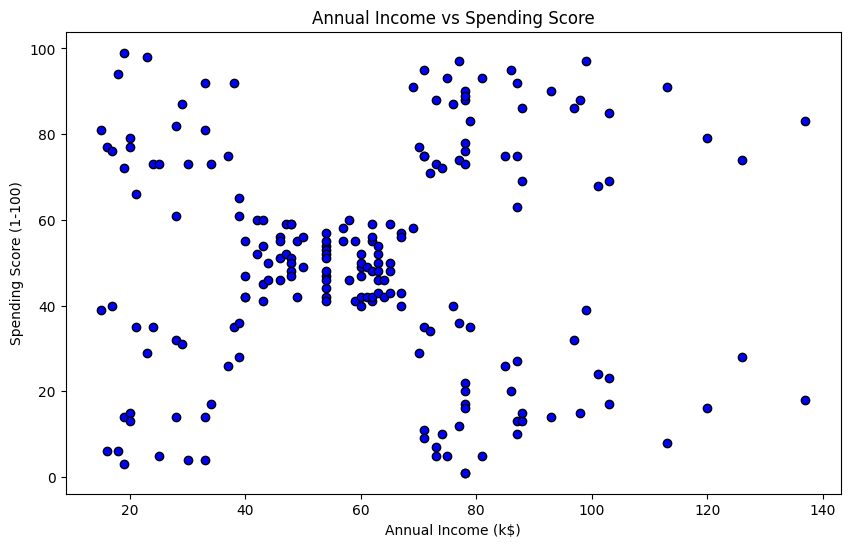

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c='blue', marker='o', edgecolor='black')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [6]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [7]:
dbscan_model=DBSCAN(eps=0.3, min_samples=5)
labels=dbscan_model.fit_predict(x_scaled)
labels

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

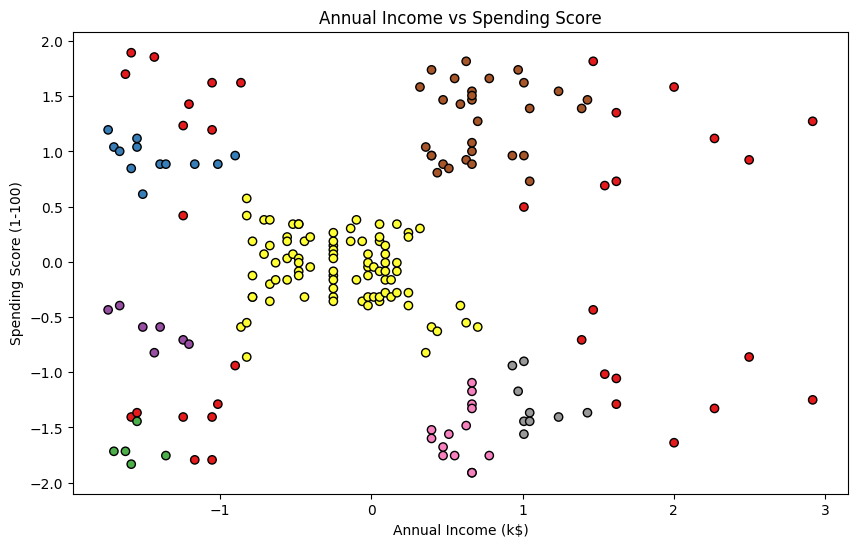

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x_scaled[:,0], x_scaled[:,1],edgecolor='black',c=labels, cmap='Set1')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.31614121976731185


In [18]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
for eps in eps_values:
    print("Evaluating DBSCAN with eps =", eps)
    dbscan_model = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan_model.fit_predict(x_scaled)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)
    print(f"Number of clusters: {n_clusters},Noise Points: {n_noise}, Noise ratio: {noise_ratio:.2f}")
    if n_clusters > 1:
        x_non_noise = x_scaled[labels != -1]
        labels_non_noise = labels[labels != -1]
        score = silhouette_score(x_non_noise, labels_non_noise)
        print(f"Silhouette Score (non-noise): {score:.4f}\n")
    else:
        print("Silhouette Score cannot be computed for less than 2 clusters.\n")

Evaluating DBSCAN with eps = 0.1
Number of clusters: 4,Noise Points: 166, Noise ratio: 0.83
Silhouette Score (non-noise): 0.5633

Evaluating DBSCAN with eps = 0.2
Number of clusters: 7,Noise Points: 77, Noise ratio: 0.39
Silhouette Score (non-noise): 0.5856

Evaluating DBSCAN with eps = 0.3
Number of clusters: 7,Noise Points: 35, Noise ratio: 0.17
Silhouette Score (non-noise): 0.5243

Evaluating DBSCAN with eps = 0.4
Number of clusters: 4,Noise Points: 15, Noise ratio: 0.07
Silhouette Score (non-noise): 0.4781

Evaluating DBSCAN with eps = 0.5
Number of clusters: 2,Noise Points: 8, Noise ratio: 0.04
Silhouette Score (non-noise): 0.3876

